<a href="https://colab.research.google.com/github/GerousDan/scoring/blob/main/scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
if 'google.colab' in sys.modules:
  gdrive = '/content/drive' # dirpath = !pwd
  if not os.path.exists(gdrive):
    from google.colab import drive
    drive.mount(gdrive)    
  dirpath = os.path.join(gdrive, 'MyDrive') # dirpath = os.path.join(dirpath[0],'sample_data')
else:
  dirpath = os.path.join(os.path.expandvars("%userprofile%"),'Downloads')

print(dirpath)

/content/drive/MyDrive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
pd.set_option('mode.chained_assignment',None)

In [ ]:
import numpy as np
def clean_dataset(df):
  assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
  df.dropna(inplace=True)
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
  return df[indices_to_keep].astype(np.float64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scaler = MinMaxScaler(feature_range=(0,10))

In [ ]:
from sklearn.preprocessing import RobustScaler
skaler = RobustScaler()

In [ ]:
# !pip install lime

In [ ]:
# from lime import lime_tabular

In [ ]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [ ]:
def scaled(features):
  for f in features:
    data[f] = [round(i,1)*10 for s in scaler.fit_transform(data[f].values.reshape(-1, 1)) for i in s]

In [ ]:
def scale(df, features):
  for f in features:
    df[f] = [round(i,1)*10 for s in scaler.fit_transform(df[f].values.reshape(-1, 1)) for i in s]

In [ ]:
file_name = 'stock-2022-05'
df = pd.read_csv(os.path.join(dirpath, file_name+'.csv'))
data=df[~df['select_base_score'].isnull()]

Text(0.5, 1.0, 'pearson correlation')

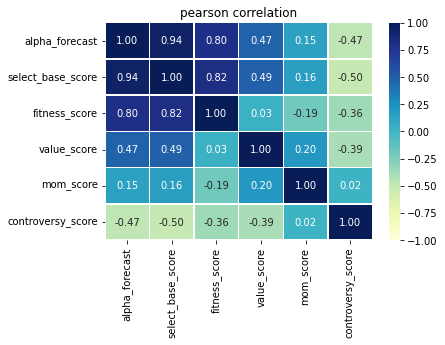

In [ ]:
dtf = df[(df['region']=='na') & (df['sector']=='Industrials') & (df['dividend_yield']==0)]
dtf = dtf[['alpha_forecast','select_base_score','fitness_score','value_score','mom_score','controversy_score']]
corr_matrix = dtf.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
print(data['sector'].unique())

['Communication Services' 'Information Technology'
 'Consumer Discretionary' 'Financials' 'Consumer Staples' 'Energy'
 'Materials' 'Utilities' 'Health Care' 'Industrials']


In [ ]:
print(data['sector'].unique())

['Communication Services' 'Information Technology'
 'Consumer Discretionary' 'Financials' 'Consumer Staples' 'Energy'
 'Materials' 'Utilities' 'Health Care' 'Industrials']


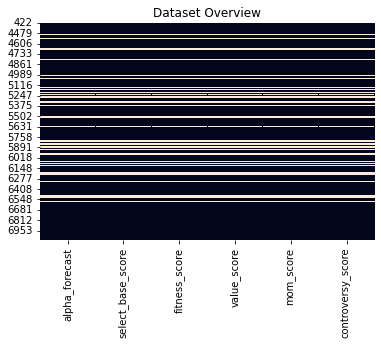

 Categerocial   Numeric   NaN 


In [ ]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alpha_forecast     6648 non-null   float64
 1   select_base_score  6648 non-null   float64
 2   fitness_score      6648 non-null   float64
 3   value_score        6648 non-null   float64
 4   mom_score          6648 non-null   float64
 5   controversy_score  6648 non-null   float64
dtypes: float64(6)
memory usage: 343.7 KB


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.0)

In [ ]:
# X = dtf_train.drop("Y", axis=1).values
# y = dtf_train["Y"].values
# feature_names = dtf_train.drop("Y", axis=1).columns

NameError: ignored

In [ ]:
# ## Anova
# selector = feature_selection.SelectKBest(score_func=  
#                feature_selection.f_classif, k=10).fit(X,y)
# anova_selected_features = feature_names[selector.get_support()]

# ## Lasso regularization
# selector = feature_selection.SelectFromModel(estimator= 
#               linear_model.LogisticRegression(C=1, penalty="l1", 
#               solver='liblinear'), max_features=10).fit(X,y)
# lasso_selected_features = feature_names[selector.get_support()]
 
# ## Plot
# dtf_features = pd.DataFrame({"features":feature_names})
# dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
# dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
# dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
# dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
# dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
# dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
# sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

NameError: ignored

In [ ]:
# scaled(['stock_volatility','active_risk','market_beta'])
# data[['stock_volatility','active_risk','market_beta']]

In [ ]:
print(df.columns.tolist())

['bwid', 'download_date', 'last_data', 'bw_ticker', 'bbg_ticker', 'exch_ticker', 'name', 'description', 'market_status', 'relative_size', 'share_price_local_cy', 'share_price_USD', 'dividend_yield', 'share_currency', 'reporting_currency', 'market_cap', 'market_cap_free_float', 'country_risk', 'country_hq', 'country_exposure', 'primary_exchange', 'exchangeCountry', 'second_listings', 'sector_theme', 'sector', 'industry', 'sub_industry', 'esg_compatible', 'tradeability', 'alpha_forecast', 'candidate', 'flag', 'alert', 'arguments', 'tech_indicator', 'auditor_caveat', 'auditor_warning', 'l3m_resid_perf', 'up_base_score', 'l1m_up_score_delta', 'down_base_score', 'l1m_down_score_delta', 'select_base_score', 'l1m_score_delta', 'fitness_score', 'bus_fitness_score', 'fin_fitness_score', 'value_score', 'valuation_score', 'mgmt_score', 'mom_score', 'fund_mom_score', 'tech_mom_score', 'controversy_score', 'active_risk', 'market_beta', 'recession_score', 'recovery_score', 'brokers_score', 'region',

In [ ]:
print(data['sector'].unique())

['Communication Services' 'Information Technology'
 'Consumer Discretionary' 'Financials' 'Consumer Staples' 'Energy'
 'Materials' 'Utilities' 'Health Care' 'Industrials']


In [ ]:
list(data[data['region']=='em']['country_risk'].unique())
print(data[data['region']=='eu']['country_risk'].unique())
# list(data[data['region']=='jp']['country_risk'].unique())
# list(data[data['region']=='na']['country_risk'].unique())

['GB' 'CH' 'FR' 'DK' 'BE' 'DE' 'ES' 'NL' 'IT' 'SE' 'FI' 'IE' 'NO' 'AT'
 'PT']


In [ ]:
list(data['candidate'].unique())

['NO', 'SHORT', 'YES', 'HIGH_OCTANE']

In [ ]:
list(data['region'].unique())

['em', 'na', 'eu', 'jp']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
yX = [
  ['select_base_score', 'fitness_score','value_score','mom_score','controversy_score'],
  ['up_base_score',     'fitness_score','value_score','mom_score','controversy_score'],
  ['down_base_score',   'fitness_score','value_score','mom_score','controversy_score'],
  ['fitness_score',     'bus_fitness_score','fin_fitness_score'],
  ['bus_fitness_score', 'long_term_eva','roc_volatility','eva_mom','eva_mom2','alpha_over_sigma','sustainable_growth','lt_growth'],
  ['fin_fitness_score', 'debt_ev','ltl_ev','merton','divi_sustainability'],
  ['fitness_score',     'bus_fitness_score','fin_fitness_score'],
  ['value_score',       'valuation_score','mgmt_score'],
  ['valuation_score',   'fcf_ev','ev_ebit_premium','sector_rel_pb','country_rel_pe'],
  ['mgmt_score',        'chge_nosh','chg_insider_holdings','chg_net_operating_assets'],
  ['mom_score',         'fund_mom_score','tech_mom_score'],
  ['fund_mom_score',    'px_surprise','chg_consensus_eps','roa_capex'],
  ['tech_mom_score',    'rel_strength_idx','money_flow_idx','pb_x_eps_g'],
  ['controversy_score', 'stock_volatility','active_risk','market_beta'],
  ['select_base_score', 'bus_fitness_score','fin_fitness_score',
                        'valuation_score','mgmt_score',
                        'fund_mom_score','tech_mom_score',
                        'controversy_score'],
  ['select_base_score', 'long_term_eva','roc_volatility','eva_mom','eva_mom2','alpha_over_sigma','sustainable_growth','lt_growth',
                        'debt_ev','ltl_ev','merton','divi_sustainability',
                        'fcf_ev','ev_ebit_premium','sector_rel_pb','country_rel_pe',
                        'chge_nosh','chg_insider_holdings','chg_net_operating_assets',
                        'px_surprise','chg_consensus_eps','roa_capex',
                        'rel_strength_idx','money_flow_idx','pb_x_eps_g',
                        'stock_volatility','active_risk','market_beta']
  ,['select_base_score','alpha_forecast']
  # ,['candidate','select_base_score','recession_score']
]

In [ ]:
print('{:>18s} | {:>8s}'.format('y','accuracy % / trained % |'))
for yXs in yX:
  temp = clean_dataset(data[yXs])
  X = temp[yXs[1:]]
  y = temp[yXs[0]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
  # X_train = scale(X_train,yXs[1:])
  # X_test = scale(X_test,yXs[1:])
  # y_train = scale(y_train,yXs[0])
  # y_test = scale(y_test,yXs[0])
  model.fit(X_train, y_train)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  print('{:>18s} | {:10.2f} / {:9.2f} | {}...'.format(yXs[0], model.score(X_test, y_test)*100, model.score(X_train, y_train)*100, yXs[1]))
  pred_test = pred_test.reshape(-1, 1)
  pred_test = scaler.fit_transform(pred_test)
  pred_test = [round(i,1) for s in pred_test for i in s]

                 y | accuracy % / trained % |
 select_base_score |      85.95 /     88.68 | fitness_score...
     up_base_score |      87.87 /     88.46 | fitness_score...
   down_base_score |      75.22 /     71.68 | fitness_score...
     fitness_score |      96.11 /     95.93 | bus_fitness_score...
 bus_fitness_score |      81.06 /     79.77 | long_term_eva...
 fin_fitness_score |      79.64 /     77.96 | debt_ev...
     fitness_score |      95.66 /     95.98 | bus_fitness_score...
       value_score |      98.35 /     98.20 | valuation_score...
   valuation_score |      83.90 /     85.61 | fcf_ev...
        mgmt_score |      85.97 /     84.33 | chge_nosh...
         mom_score |      94.61 /     93.69 | fund_mom_score...
    fund_mom_score |      76.12 /     79.93 | px_surprise...
    tech_mom_score |      88.09 /     86.97 | rel_strength_idx...
 controversy_score |      89.51 /     89.09 | stock_volatility...
 select_base_score |      89.42 /     87.38 | bus_fitness_score...
 select

In [ ]:
data['upcycle'] = (data['up_base_score'] == data['select_base_score'])
n = sum(data['upcycle'])
if n > 0:
  print(n,"  upcycle scores computed")
n = len(data) - n
if n > 0:
  print(n,"downcycle scores computed")

In [ ]:
data['bw_exchange'] = data["bw_ticker"].str.split(":", n = 1, expand = True)[1]

In [ ]:
data.groupby(['exchangeCountry','primary_exchange','bw_exchange'])['bw_exchange'].count()

In [ ]:
print(data['bw_exchange'].unique())

In [ ]:
print(data['primary_exchange'].unique())

In [ ]:
X_test

In [ ]:
pred_test

In [ ]:
y_test

In [ ]:
type(y_test)

In [ ]:
type(pred_test)

In [ ]:
d = {'select_base_score': y_test, 'pred_test': pred_test}

pd.concat([pd.Series(v, name=k) for k, v in d.items()], axis=1)

In [ ]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = survey.data[survey.feature_names]
X.describe(include="all")

In [ ]:
data.describe()

,share_price_local_cy,share_price_USD,dividend_yield,market_cap,market_cap_free_float,alpha_forecast,l3m_resid_perf,up_base_score,l1m_up_score_delta,down_base_score,...,absolute_return_L1M,absolute_return_L3M,absolute_return_YTD,absolute_return_L6M,absolute_return_L1Y,relative_return_L1M,relative_return_L3M,relative_return_YTD,relative_return_L6M,relative_return_L1Y
count,6636.000000,6648.000000,6648.000000,6.648000e+03,6645.000000,6648.000000,6648.000000,6648.000000,6577.000000,6648.000000,...,6648.000000,6648.000000,6648.000000,6640.000000,6571.000000,6648.000000,6648.000000,6648.000000,6640.000000,6571.000000
mean,6404.513641,155.556544,2.546441,1.401087e+10,0.725520,-0.005681,-0.117599,4.591080,-0.012772,4.620999,...,-0.091843,-0.078484,-0.114266,-0.133614,-0.068174,0.001527,0.025581,0.021315,0.011211,0.042858
std,41846.597505,6060.435596,2.411408,6.262865e+10,0.253840,0.039153,2.602300,2.930454,0.758445,2.946366,...,0.109661,0.192171,0.239937,0.267656,0.455505,0.109775,0.192074,0.239177,0.268038,0.466579
min,0.012400,0.000307,0.000000,2.605240e+06,0.000081,-0.238310,-4.000000,0.000000,-8.500000,0.000000,...,-0.842901,-0.999126,-0.999173,-0.999303,-0.999055,-0.759615,-0.878599,-0.869055,-0.846239,-0.958028
25%,13.700000,3.808582,0.290000,1.483790e+09,0.509188,-0.025979,-2.400000,2.100000,-0.200000,2.100000,...,-0.145854,-0.182320,-0.252100,-0.282003,-0.283829,-0.053517,-0.079958,-0.115441,-0.133394,-0.182845
50%,48.430000,16.820723,2.020000,3.449762e+09,0.794844,-0.004066,-0.200000,4.500000,0.000000,4.600000,...,-0.081624,-0.089787,-0.125101,-0.141264,-0.105649,0.010699,0.016661,0.010648,0.005200,-0.004547
75%,228.062500,49.126263,4.000000,9.455392e+09,0.971143,0.015169,2.100000,6.800000,0.200000,7.000000,...,-0.028112,0.014611,0.002385,0.000352,0.075467,0.065764,0.118643,0.137136,0.144165,0.200195
max,847915.696034,481400.000000,8.100000,2.555135e+12,1.000000,0.194504,4.000000,10.000000,9.000000,10.000000,...,0.687718,1.499294,2.019718,2.663527,11.671429,0.771004,1.619822,2.152032,2.816591,11.681791
